https://www.coursera.org/learn/classification-vector-spaces-in-nlp/lecture/dDdRc/welcome-to-the-nlp-specialization

Course on NLP on coursera

Kind of sentiment analysis and introduction to representation of text as vectors.

This week is scoped mainly of logistic regression model and basic text preprocessing methods.

Actually programming assigment was public only with paid version of coursera. So i created this one for myself..

What goona to do..?

Data are downloaded from https://www.kaggle.com/arkhoshghalb/twitter-sentiment-analysis-hatred-speech ..
There is also described context of used data.

I tried to apply basic preprocessing methods, especially stemming, punctuation.. i also tried to represent text as vector.

In [107]:
import pandas as pd
import os
import nltk
nltk.download('stopwords')
import matplotlib.pyplot as plt


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vojta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
print(os.getcwd())

C:\Users\Vojta\Desktop\own\university\ing\projects\seminar\analysis\jupyters


In [16]:
PATH_TO_DATASET = '00_week\\'

In [17]:
train_data = pd.read_csv(f'{PATH_TO_DATASET}train.csv', ',')

In [18]:
train_data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [20]:
test_data = pd.read_csv(f'{PATH_TO_DATASET}test.csv', ',')

In [22]:
test_data.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [24]:
print('train-data shape:', train_data.shape)
print('test-data shape:', test_data.shape)

train-data shape: (31962, 3)
test-data shape: (17197, 2)


In [61]:
is_racist = train_data[train_data['label'] == 0].shape[0]
print(is_racist)

29720


In [62]:
is_not_racist = train_data[train_data['label'] == 1].shape[0]
print(is_not_racist)

In [63]:
print(is_racist + is_not_racist)

31962


In [66]:
test_corpus = train_data['tweet']
test_corpus.head()

0     @user when a father is dysfunctional and is s...
1    @user @user thanks for #lyft credit i can't us...
2                                  bihday your majesty
3    #model   i love u take with u all the time in ...
4               factsguide: society now    #motivation
Name: tweet, dtype: object

In [83]:
test_corpus_aslist = list(test_corpus)
print(test_corpus_aslist[1])

@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked


In [93]:
from nltk.corpus import stopwords
import re
import preprocessor as p

In [100]:
sr = stopwords.words('english')

cleaned_tweets = []

REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\|)|(\()|(\))|(\[)|(\])|(\%)|(\$)|(\>)|(\<)|(\{)|(\})")
REPLACE_WITH_SPACE = re.compile("(<br\s/><br\s/?)|(-)|(/)|(:).")


for tweet in test_corpus_aslist:
    cleaned_tweet = p.clean(tweet)
    cleaned_tweet = REPLACE_NO_SPACE.sub('', cleaned_tweet.lower())
    cleaned_tweet = REPLACE_WITH_SPACE.sub(" ", cleaned_tweet)
    cleaned_tweets.append(" ".join([token for token in cleaned_tweet.split(' ') if token not in sr]))


father dysfunctional selfish drags kids dysfunction


father dysfunctional selfish drags kids dysfunction thanks credit cant use cause dont offer wheelchair vans pdx bihday majesty love u take u time ur factsguide society 2 2 huge fan fare big talking leave chaos pay disputes get camping tomorrow danny next school year year exams cant think love land welcome  im  consumer price index mom climbed previous   may selfish get see daddy today calls middle school build wall chant  comment ouchjunior angry thankful paner retweet agree  smiles around via ig user make people know essential oils made chemicals people blaming ha conceded goal fat rooney gave away free kick knowing bale hit sad little dude product day happy man tool whos  time open &amp drink lumpy says  prove lumpy  beautiful sign vendor 4500   sunday love great panel mediatization public service happy fathers day people went nightclub good night mans actions means people lost families forever never chance vote presidential candidate excited cycle looks different  rip fellow nohern 

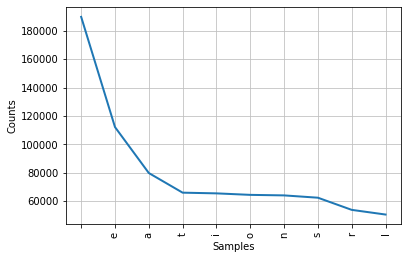

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [126]:

print(" ".join(cleaned_tweets))
freq = nltk.FreqDist(" ".join(cleaned_tweets))


freq.plot(10)

In [114]:
from nltk.tokenize import word_tokenize